<a href="https://colab.research.google.com/github/vaishnaviravi506/LGMVIP-DataScience-Intern/blob/INTERMEDIATE-LEVEL-TASK/Copy_of_TASK1_intermediate_level_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis - Global Terrorism.**

#To Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

In this task we will perform 'Exploratory Data Analysis' on dataset 'Global Terrorism'. As a security/defence analyst we will try to find out the hot zone of terrorism. We will also try to derive all security issues and insights from this exploratory data analysis.

In [ ]:
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import animation
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Base for Analysis.csv')
df.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,...,nperps,claimed,weaptype1_txt,nkill,nkillter,nwound,propextent_txt,ishostkid,ransom,nreleased
0,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,1.0,1.0,NaN
1,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,0.0,NaN
2,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,...,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,197001010002,1970,1,1,0,United States,North America,Cairo,37.005105,-89.176269,...,-99.0,0.0,Firearms,0.0,0.0,0.0,Minor (likely < $1 million),0.0,0.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16418 entries, 0 to 16417
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventid          16418 non-null  int64  
 1   iyear            16418 non-null  int64  
 2   imonth           16418 non-null  int64  
 3   iday             16418 non-null  int64  
 4   extended         16418 non-null  int64  
 5   country_txt      16418 non-null  object 
 6   region_txt       16418 non-null  object 
 7   city             16418 non-null  object 
 8   latitude         15825 non-null  float64
 9   longitude        15824 non-null  float64
 10  vicinity         16417 non-null  float64
 11  crit1            16417 non-null  float64
 12  multiple         16417 non-null  float64
 13  success          16417 non-null  float64
 14  suicide          16417 non-null  float64
 15  attacktype1_txt  16417 non-null  object 
 16  targtype1_txt    16417 non-null  object 
 17  natlty1_txt 

In [ ]:
print ('dataframe shape: ', df.shape)

dataframe shape:  (16418, 29)


In [ ]:
print ('Existance of nul values', df.isnull().values.any())
print ('Total number of null values in entire dataframe: ', df.isnull().sum().sum())

Existance of nul values True
Total number of null values in entire dataframe:  76797


In [ ]:
print ('Number of null values in named col of dataframe: ', df.isnull().sum())

Number of null values in named col of dataframe:  eventid                0
iyear                  0
imonth                 0
iday                   0
extended               0
country_txt            0
region_txt             0
city                   0
latitude             593
longitude            594
vicinity               1
crit1                  1
multiple               1
success                1
suicide                1
attacktype1_txt        1
targtype1_txt          1
natlty1_txt           52
gname                  1
nperps             13058
claimed            15479
weaptype1_txt          1
nkill               2717
nkillter           14963
nwound              4137
propextent_txt      8839
ishostkid            164
ransom               261
nreleased          15931
dtype: int64


In [ ]:
df.rename(columns =
                  {'iyear':'year',
                   'imonth':'month',
                   'iday':'day',
                   'country_txt' : 'country',
                   'region_txt' : 'region',
                   'crit1' : 'crit',
                   'attacktype1_txt' : 'attacktype',
                   'targtype1_txt' : 'targettype',
                   'natlty1_txt' : 'nationalityofvic',
                   'gname' : 'organisation',
                   'claimed' : 'claimedresp',
                   'weaptype1_txt' : 'weapontype',
                   'nkill' : 'nkilled',
                   'nkillter' : 'nkillonlyter',
                   'nwound' : 'nwounded',
                   'propextent_txt' : 'propdamageextent',
                   'ishostkid' : 'victimkidnapped',
                   'ransom' : 'ransomdemanded',
                   }, inplace = True)

In [ ]:
#Add column ncasualties (Number of Dead/Injured people) by adding Nkill and Nwound
df['ncasualties'] = df['nkilled'] + df['nwounded']

In [ ]:
# Limit long strings
df['weapontype'] = df['weapontype'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')

df['propdamageextent'] = df['propdamageextent'].replace('Minor (likely < $1 million)', 'Minor')
df['propdamageextent'] = df['propdamageextent'].replace('Major (likely > 1 billion)', 'Major')
df['propdamageextent'] = df['propdamageextent'].replace('Catastrophic (likely > $1 billion)', 'Catastrophic')

In [ ]:
df.head(10)

,eventid,year,month,day,extended,country,region,city,latitude,longitude,...,claimedresp,weapontype,nkilled,nkillonlyter,nwounded,propdamageextent,victimkidnapped,ransomdemanded,nreleased,ncasualties
0,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,NaN,Unknown,0.0,NaN,0.0,NaN,1.0,1.0,NaN,0.0
1,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,0.0,NaN,1.0
2,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,...,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,197001010002,1970,1,1,0,United States,North America,Cairo,37.005105,-89.176269,...,0.0,Firearms,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
5,197001050001,1970,1,1,0,United States,North America,Baraboo,43.468500,-89.744299,...,NaN,Explosives,0.0,NaN,0.0,Minor,0.0,0.0,NaN,0.0
6,197001020001,1970,1,2,0,Uruguay,South America,Montevideo,-34.891151,-56.187214,...,NaN,Firearms,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
7,197001020002,1970,1,2,0,United States,North America,Oakland,37.791927,-122.225906,...,0.0,Explosives,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
8,197001020003,1970,1,2,0,United States,North America,Madison,43.076592,-89.412488,...,1.0,Incendiary,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
9,197001030001,1970,1,3,0,United States,North America,Madison,43.072950,-89.386694,...,0.0,Incendiary,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0


In [ ]:
print ('final dataframe shape: ', df.shape)

final dataframe shape:  (16418, 30)


In [ ]:
#Check for general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16418 entries, 0 to 16417
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           16418 non-null  int64  
 1   year              16418 non-null  int64  
 2   month             16418 non-null  int64  
 3   day               16418 non-null  int64  
 4   extended          16418 non-null  int64  
 5   country           16418 non-null  object 
 6   region            16418 non-null  object 
 7   city              16418 non-null  object 
 8   latitude          15825 non-null  float64
 9   longitude         15824 non-null  float64
 10  vicinity          16417 non-null  float64
 11  crit              16417 non-null  float64
 12  multiple          16417 non-null  float64
 13  success           16417 non-null  float64
 14  suicide           16417 non-null  float64
 15  attacktype        16417 non-null  object 
 16  targettype        16417 non-null  object

In [ ]:
# Converting the dataframe to a csv file and upload with the name BaseForAnalysis_Version2.csv
df.to_csv("BaseForAnalysis_Version2.csv", sep = ",")

#DATA ANALYSIS AND VISUALISATION

In [ ]:
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import animation
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import plotly.express as px

In [ ]:
pf=pd.read_csv('BaseForAnalysis_Version2.csv')

In [ ]:
pf.head()

,Unnamed: 0,eventid,year,month,day,extended,country,region,city,latitude,...,claimedresp,weapontype,nkilled,nkillonlyter,nwounded,propdamageextent,victimkidnapped,ransomdemanded,nreleased,ncasualties
0,0,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,...,NaN,Unknown,0.0,NaN,0.0,NaN,1.0,1.0,NaN,0.0
1,1,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,...,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,0.0,NaN,1.0
2,2,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,...,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,3,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,...,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,4,197001010002,1970,1,1,0,United States,North America,Cairo,37.005105,...,0.0,Firearms,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0


In [ ]:
pf.columns

Index(['Unnamed: 0', 'eventid', 'year', 'month', 'day', 'extended', 'country',
       'region', 'city', 'latitude', 'longitude', 'vicinity', 'crit',
       'multiple', 'success', 'suicide', 'attacktype', 'targettype',
       'nationalityofvic', 'organisation', 'nperps', 'claimedresp',
       'weapontype', 'nkilled', 'nkillonlyter', 'nwounded', 'propdamageextent',
       'victimkidnapped', 'ransomdemanded', 'nreleased', 'ncasualties'],
      dtype='object')

In [ ]:
pf.rename(columns= { 'nkilled':'Killed','nwounded':'Wounded','nreleased':'Released','Weapontype':'Weapon Type',
                    'ncasualties':'Casualties','nationalityofvic':'Nationality of Vic','targettype':'Targettype',
                    'victimkidnapped':'Victim Kidnapped','ransomdemanded':'Randsom Demanded','attacktype':'Attacktype'},inplace=True)
pf.columns

Index(['Unnamed: 0', 'eventid', 'year', 'month', 'day', 'extended', 'country',
       'region', 'city', 'latitude', 'longitude', 'vicinity', 'crit',
       'multiple', 'success', 'suicide', 'Attacktype', 'Targettype',
       'Nationality of Vic', 'organisation', 'nperps', 'claimedresp',
       'weapontype', 'Killed', 'nkillonlyter', 'Wounded', 'propdamageextent',
       'Victim Kidnapped', 'Randsom Demanded', 'Released', 'Casualties'],
      dtype='object')

##Analysis of the numerical figures in the data frame

In [ ]:
pf[['Killed', 'nkillonlyter', 'Wounded', 'propdamageextent',
        'Casualties']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Killed,13701.0,1.381578,6.641646,0.0,0.0,0.0,1.0,422.0
nkillonlyter,1455.0,0.345017,2.517176,0.0,0.0,0.0,0.0,85.0
Wounded,12281.0,1.319681,8.077994,0.0,0.0,0.0,0.0,300.0
Casualties,12192.0,2.622867,11.603249,0.0,0.0,0.0,1.0,422.0


In [ ]:
pf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16418 entries, 0 to 16417
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16418 non-null  int64  
 1   eventid             16418 non-null  int64  
 2   year                16418 non-null  int64  
 3   month               16418 non-null  int64  
 4   day                 16418 non-null  int64  
 5   extended            16418 non-null  int64  
 6   country             16418 non-null  object 
 7   region              16418 non-null  object 
 8   city                16418 non-null  object 
 9   latitude            15825 non-null  float64
 10  longitude           15824 non-null  float64
 11  vicinity            16417 non-null  float64
 12  crit                16417 non-null  float64
 13  multiple            16417 non-null  float64
 14  success             16417 non-null  float64
 15  suicide             16417 non-null  float64
 16  Atta

Text(0.5, 1.0, 'Number of Terrorist Attack by Year')

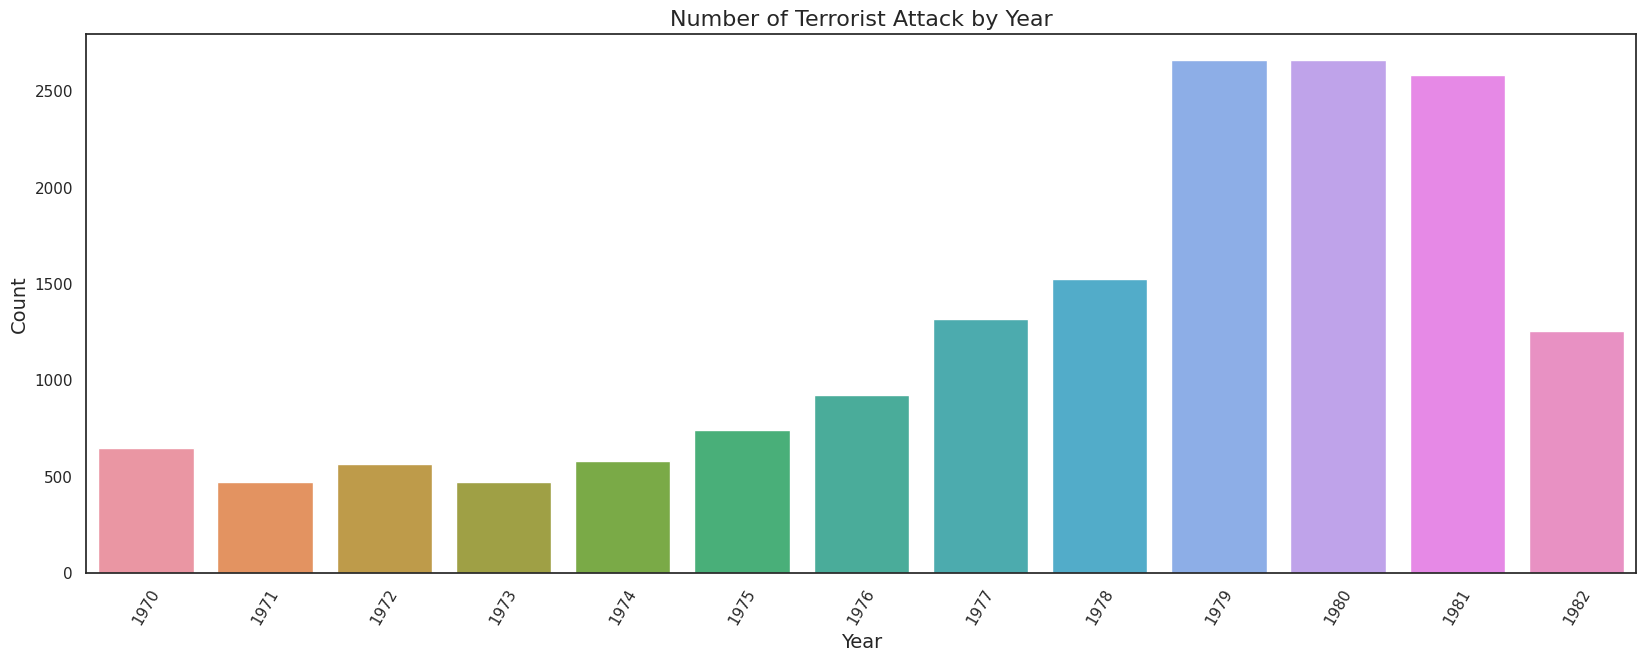

In [ ]:
f = plt.figure(figsize=(20, 7))

sns.set(font_scale = 1.1)
sns.set_theme(style="white", palette=None)
xaxis = sns.countplot(x = 'year', data = pf)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Number of Terrorist Attack by Year', fontsize = 16)

##Methods of Terriorst Attack

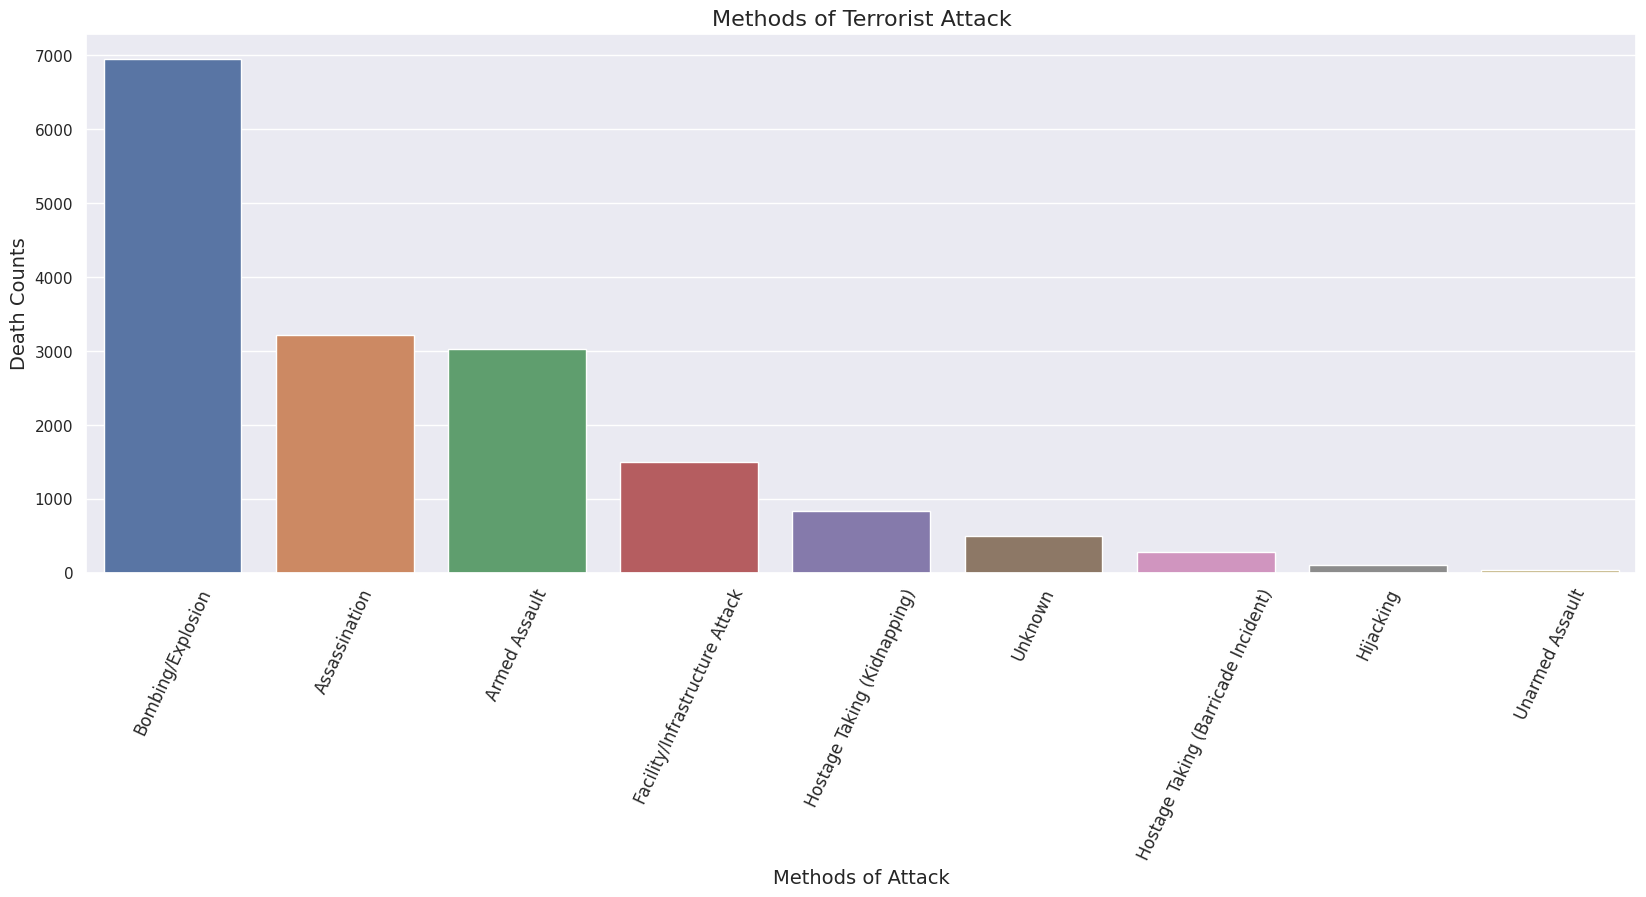

In [ ]:
plt.figure(figsize=(20, 7))
sns.set(font_scale=1.0)

attack_type_counts = pf['Attacktype'].value_counts()

sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values)
plt.xlabel('Methods of Attack', fontsize=14)
plt.ylabel('Death Counts', fontsize=14)
plt.title('Methods of Terrorist Attack', fontsize=16)
plt.xticks(rotation=65, fontsize=12)

plt.show()

##Number of Attacks by Region

Text(0.5, 1.0, 'Number of Terrorist Attack by Region')

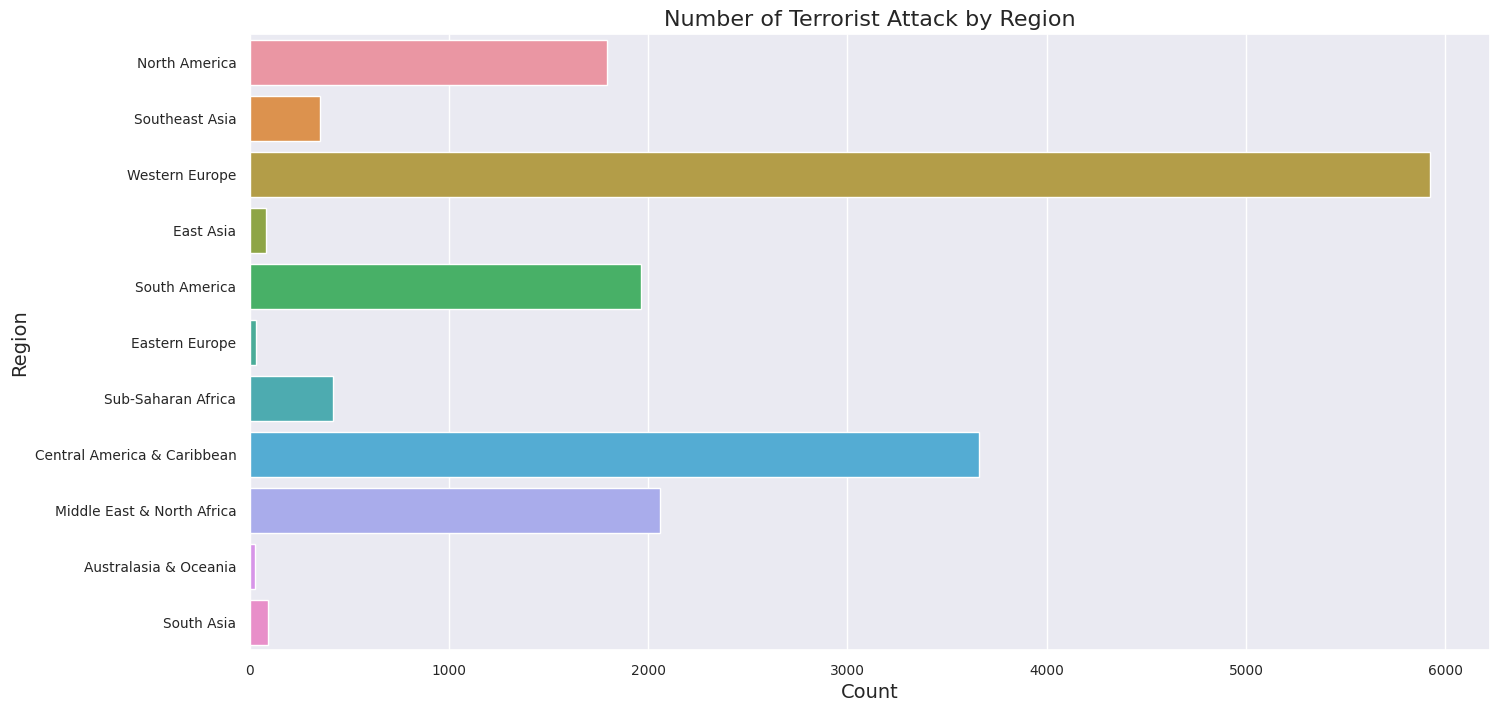

In [ ]:
f = plt.figure(figsize=(16, 8))

sns.set(font_scale=0.9)
sns.countplot(y='region', data= df)
plt.ylabel('Region', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.title('Number of Terrorist Attack by Region', fontsize=16)

##Most Attcaked Target Types

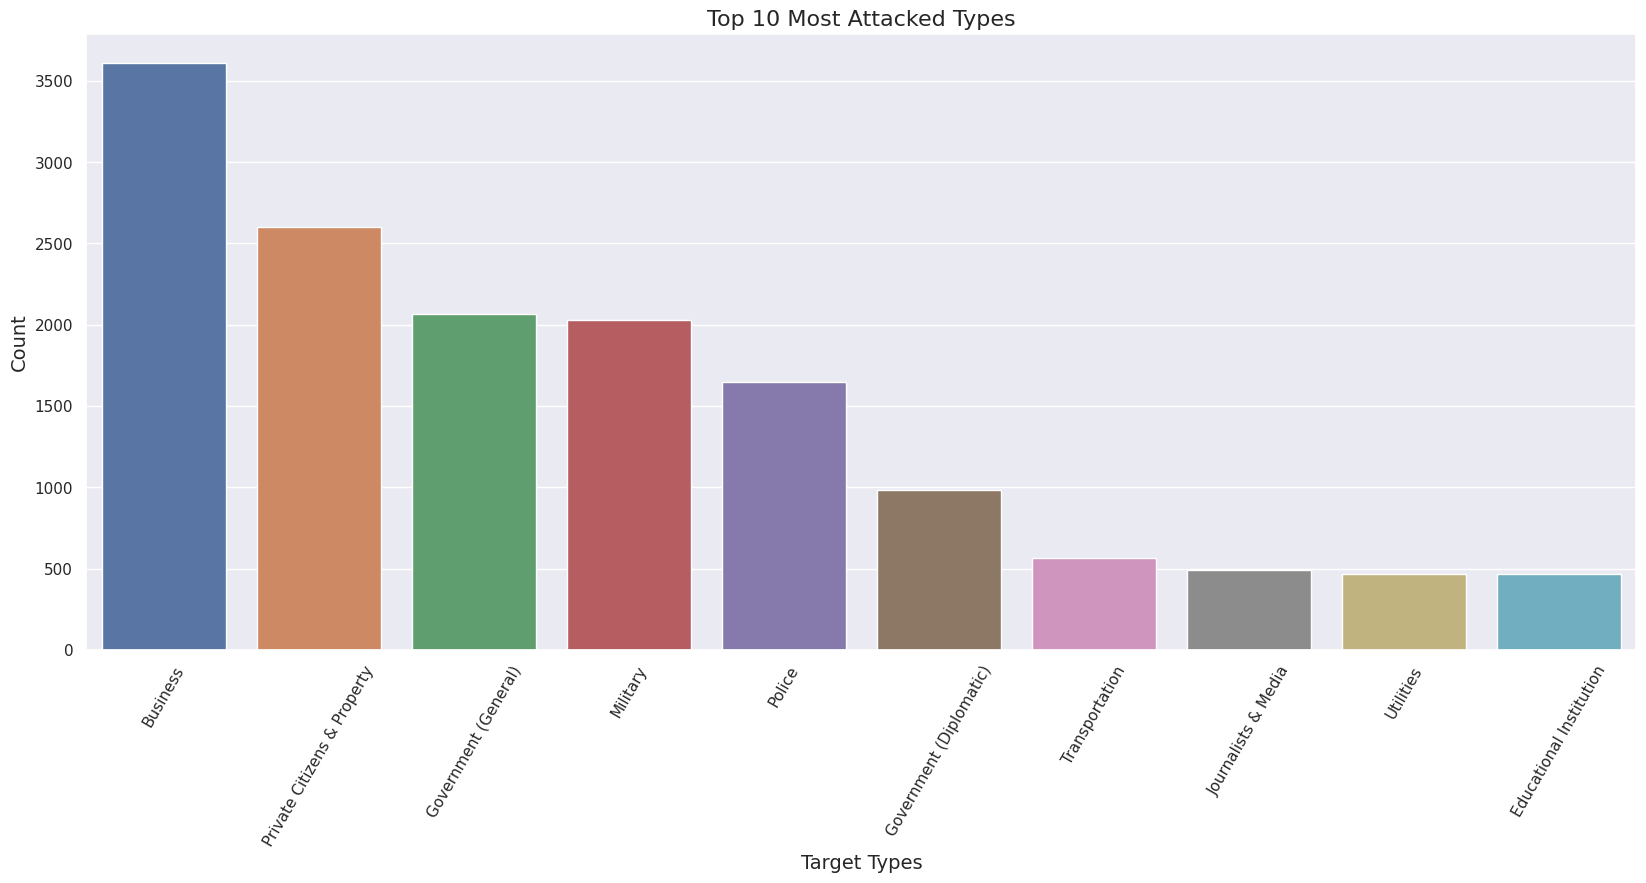

In [ ]:
f = plt.figure(figsize=(20, 8))
sns.set(font_scale=1.0)

top_10_targets = df['targettype'].value_counts().nlargest(10).index

xaxis = sns.countplot(x='targettype', data=df, order=top_10_targets)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)

plt.xlabel('Target Types', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Most Attacked Types', fontsize=16)
plt.show()

##Top 10 Contries with most number of Attacks by terror groups

Text(0.5, 1.0, 'Top 10 Countries: Most Attacks by Terrorist Groups')

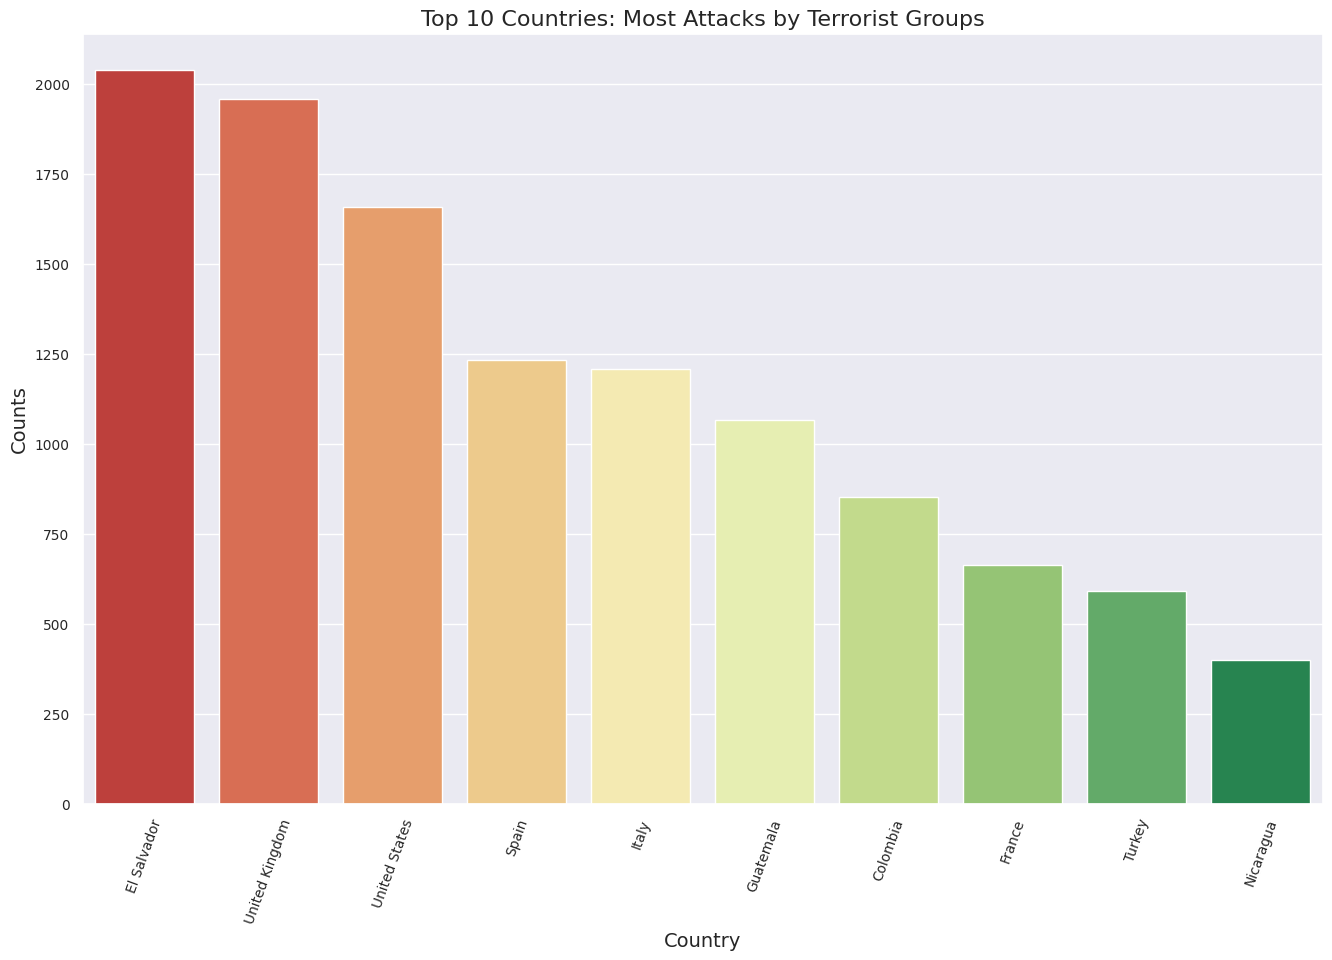

In [ ]:
fig= plt.figure(figsize=(16, 10))
sns.set(font_scale=0.9)
terror_country = sns.barplot(x=df['country'].value_counts()[0:10].index, y=df['country'].value_counts()[0:10], palette='RdYlGn')
terror_country.set_xticklabels(terror_country.get_xticklabels(), rotation=70)
terror_country.set_xlabel('Country', fontsize=14)
terror_country.set_ylabel('Counts', fontsize=14)
plt.title('Top 10 Countries: Most Attacks by Terrorist Groups', fontsize=16)

##Most attacks Cities in the World

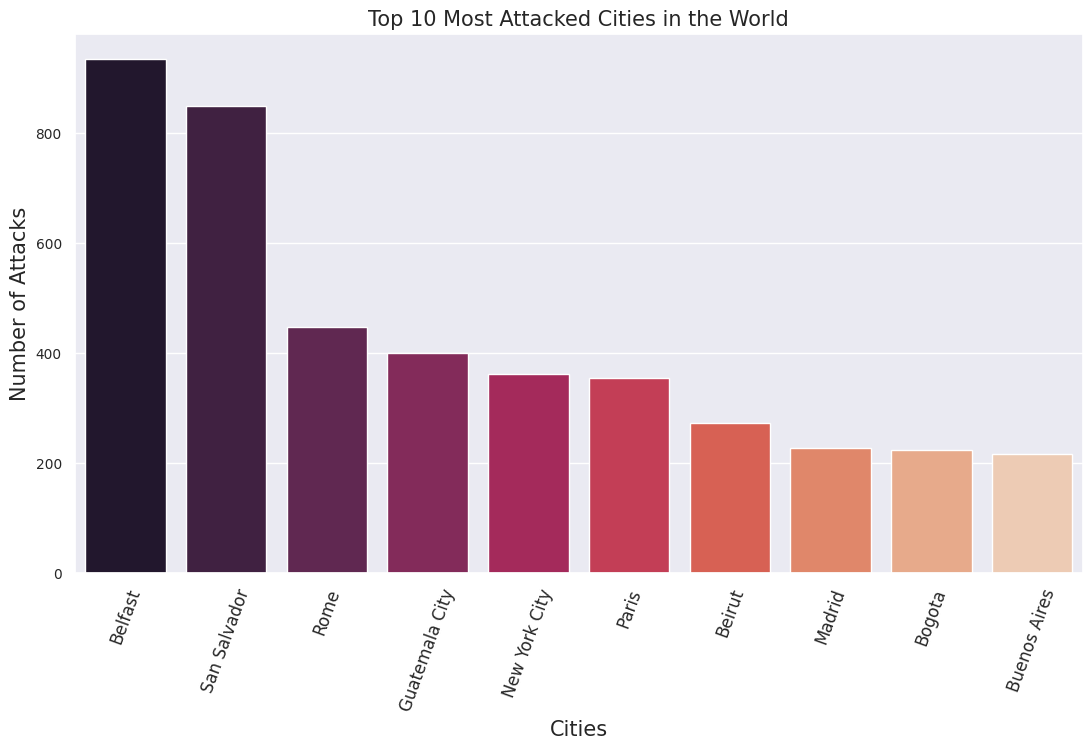

In [ ]:
plt.figure(figsize=(13, 7))
top_10_cities = pf['city'].value_counts().head(11)  # Increase head count by 1 to include Unknown

# Remove 'Unknown' from top cities
top_10_cities = top_10_cities[top_10_cities.index != 'Unknown']

sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='rocket')
plt.title('Top 10 Most Attacked Cities in the World', fontsize=15)
plt.xlabel('Cities', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=70, fontsize=12)

plt.show()

##Most Used weapon types in Terror Attacks

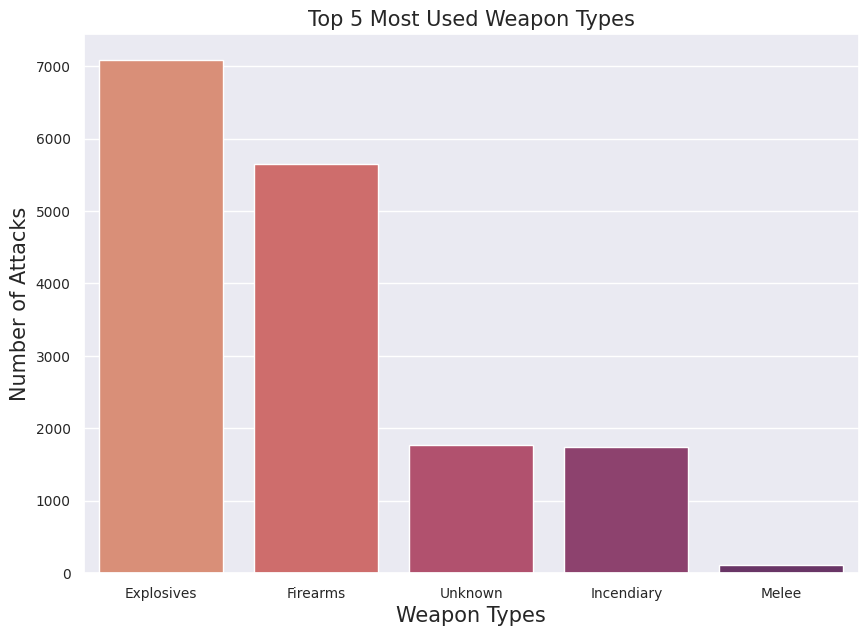

In [ ]:
# Top 5 most used weapons types in terror attacks
plt.figure(figsize=(10, 7))
top_5_weapon_types = pf['weapontype'].value_counts().head()

sns.barplot(x=top_5_weapon_types.index, y=top_5_weapon_types.values, palette='flare')
plt.title('Top 5 Most Used Weapon Types', fontsize=15)
plt.xlabel('Weapon Types', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.show()

##Exploring terror attacks by different terrorist organizations

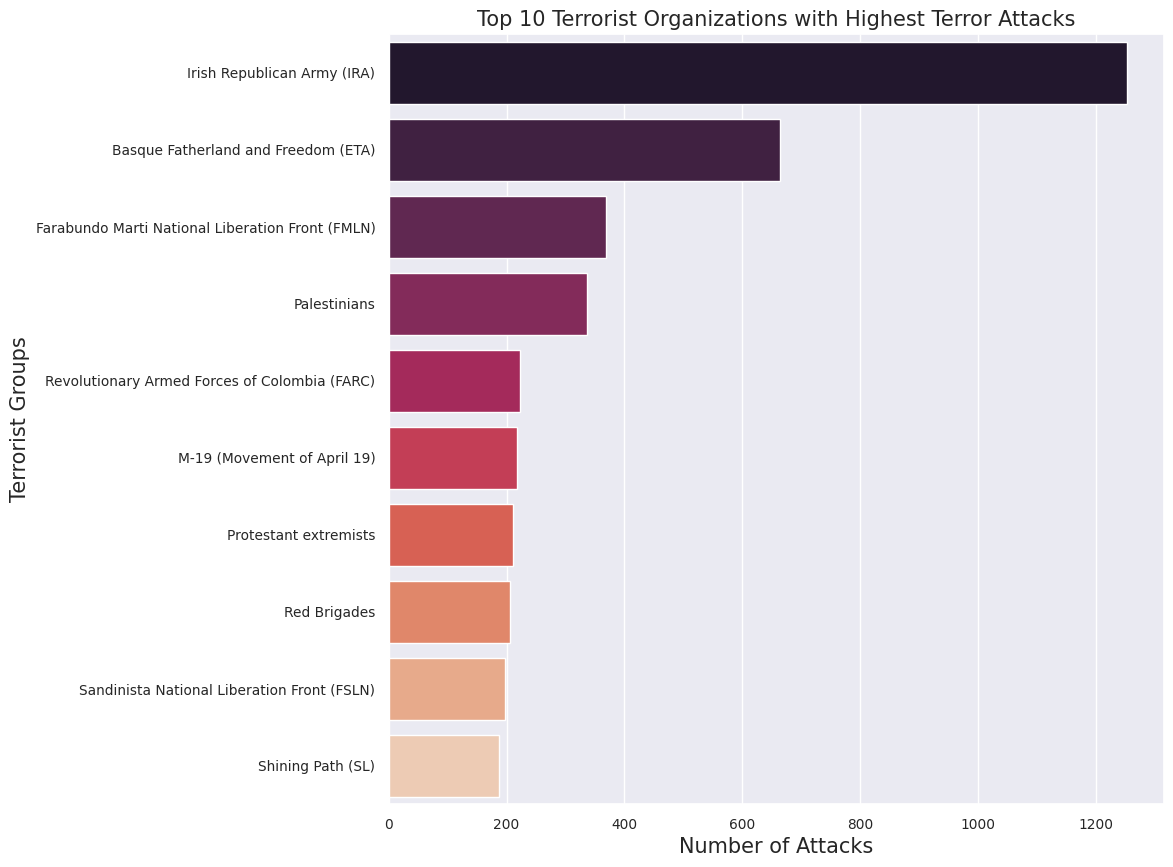

In [ ]:
plt.figure(figsize=(10, 10))
top_10_organizations = pf['organisation'].value_counts().head(11)
top_10_organizations = top_10_organizations[top_10_organizations.index != 'Unknown']

sns.barplot(x=top_10_organizations.values, y=top_10_organizations.index, palette='rocket')
plt.title('Top 10 Terrorist Organizations with Highest Terror Attacks', fontsize=15)
plt.xlabel('Number of Attacks', fontsize=15)
plt.ylabel('Terrorist Groups', fontsize=15)

plt.show()

##Analysis of number of attacks in a region on a particular calender year

This helps us compare the rise / fall of attacks on a region

In [ ]:
region_year = pd.crosstab(pf.year, pf.region)

region_year.head(20)

region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317
1975,0,9,12,0,44,159,55,4,7,12,438
1976,0,45,2,0,55,125,91,4,12,11,578
1977,0,24,4,2,211,149,119,2,8,29,771
1978,2,199,35,2,128,117,222,2,44,46,729


Text(0.5, 1.0, 'Number of Attacks per Region by Year')

<Figure size 1600x1000 with 0 Axes>

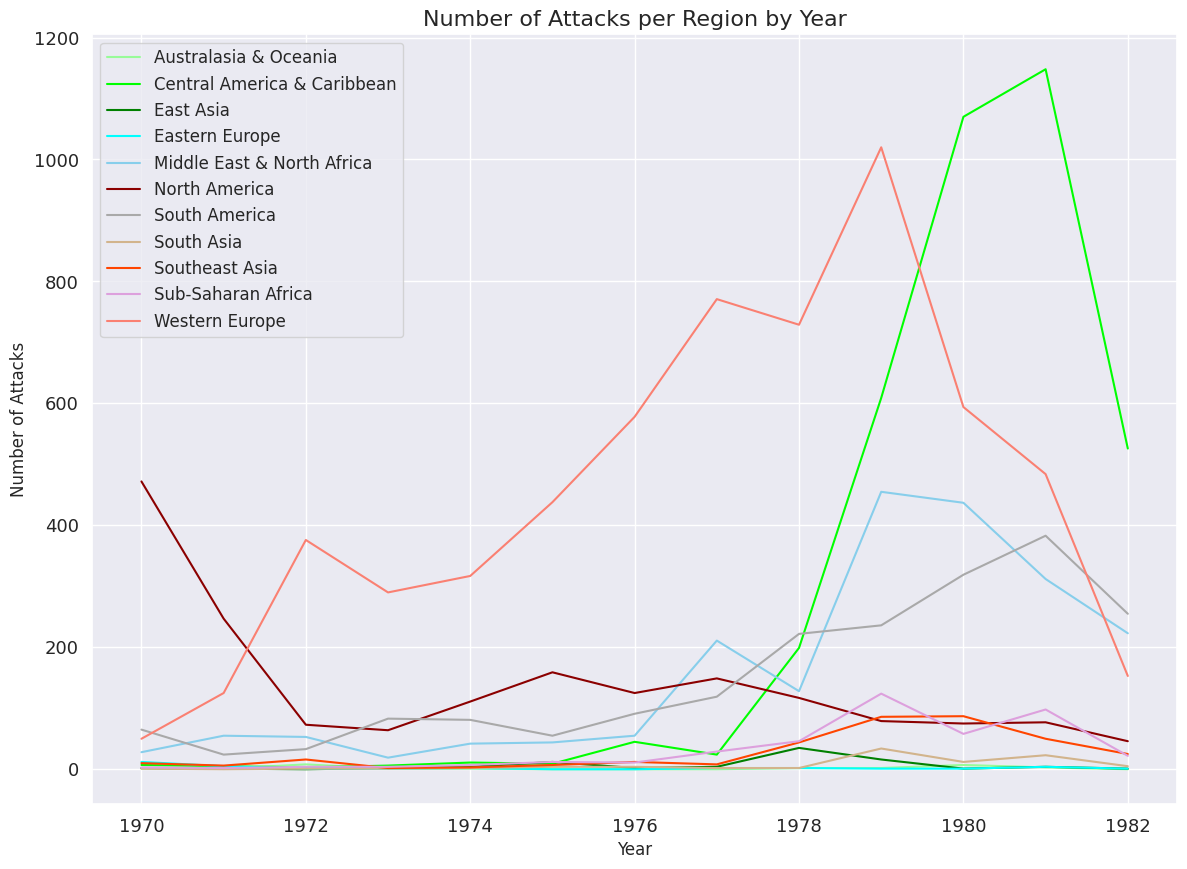

In [ ]:
fig = plt.figure(figsize=(16, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'aqua', 'skyblue', 'darkred', 'darkgray', 'tan',
                     'orangered', 'plum', 'salmon', 'mistyrose', 'gold', 'teal', 'violet', 'coral', 'seagreen']
region_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(fontsize=12)
plt.title('Number of Attacks per Region by Year', fontsize=16)

In [ ]:
attacktype_year = pd.crosstab(pf.year, pf.Attacktype)

attacktype_year.head(20)

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
year,,,,,,,,,
1970,61,22,333,174,11,3,38,3,6
1971,44,70,239,88,6,1,20,0,3
1972,63,265,188,19,12,4,16,0,1
1973,62,164,149,36,8,7,43,3,1
1974,46,158,285,42,3,5,37,4,1
1975,81,181,370,64,1,13,27,0,3
1976,124,204,419,113,4,6,45,3,5
1977,254,146,635,182,7,14,67,0,14
1978,241,263,644,181,0,43,97,5,52


Text(0.5, 1.0, 'Weapon trends by Year')

<Figure size 1600x1000 with 0 Axes>

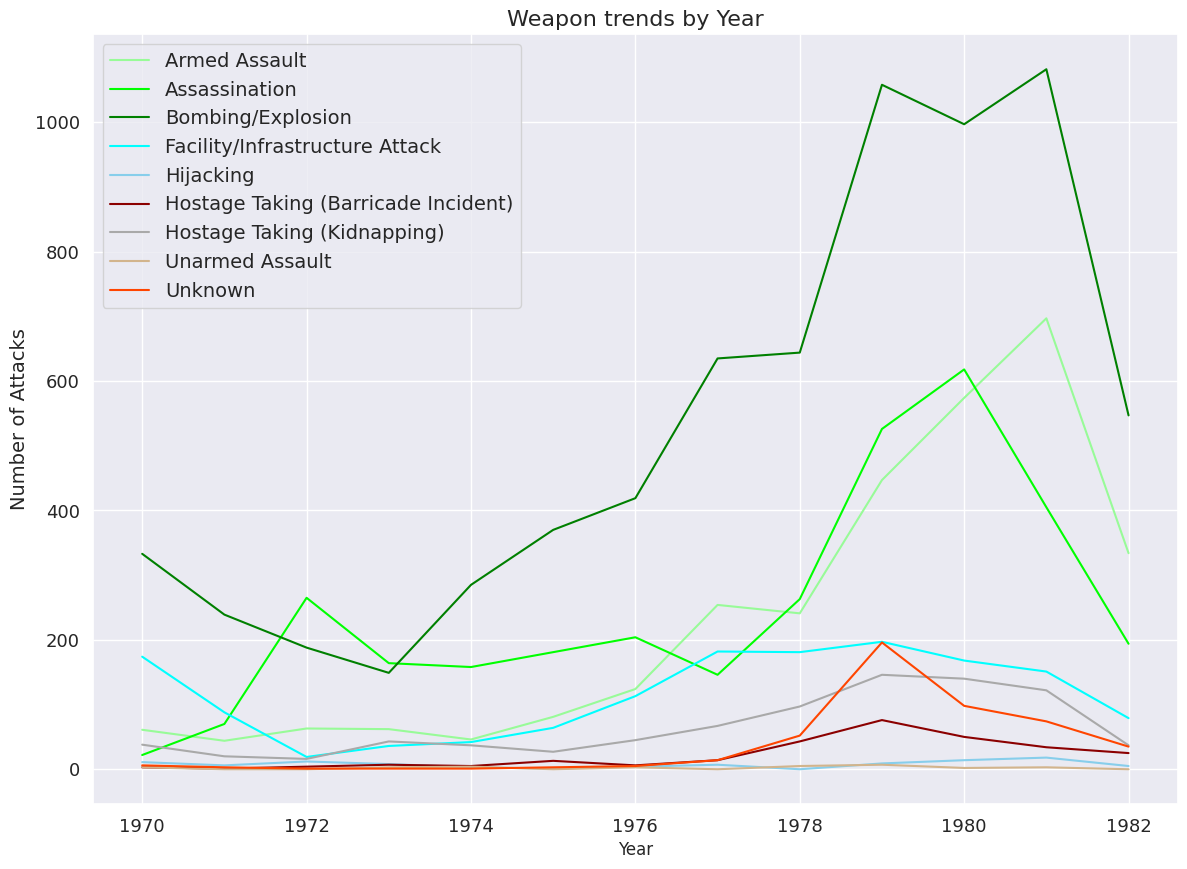

In [ ]:
fig = plt.figure(figsize=(16, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan',
                    'orangered', 'plum', 'salmon', 'mistyrose']
attacktype_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
#region_year.plot(figsize=(14, 10), fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=14)
plt.legend(fontsize=14)
plt.title('Weapon trends by Year', fontsize=16)

#**Results of Analysis:**

##After performing the Exploratory Data Analysis, we get the following insights from the data:

1.Most of the attacks were attacked through explosives and then through firearms.

2.Attacks were more during 2014 and then in 2015 on average  attacks per day. When compared to attacks from 1970 onwards, the last 6 years scored a maximum.

3.Iraq dominates all the countries, and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.

4.The State and City that was most affected was Baghdad.

5.The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.

6.For most of the attacks, the target is Private Citizens& property and the next Military leads.

7.Most of the attacks were through either Bombing or Explosion.

##Measures to be Taken to Reduce Terrorism:

1.By reducing access to dangerous weapons

2.More surveillance is required especially in the Middle East & North African Regions.

3.Strict border policy should be implemented to prevent the movement of explosives between the regions.

4.Government should take measures on increased immigration.